In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [43]:
insurance_df = pd.read_csv('insurance.csv')
insurance_df.head(15)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [64]:
# Handle any missing values
insurance_df.dropna(inplace=True)
print(insurance_df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


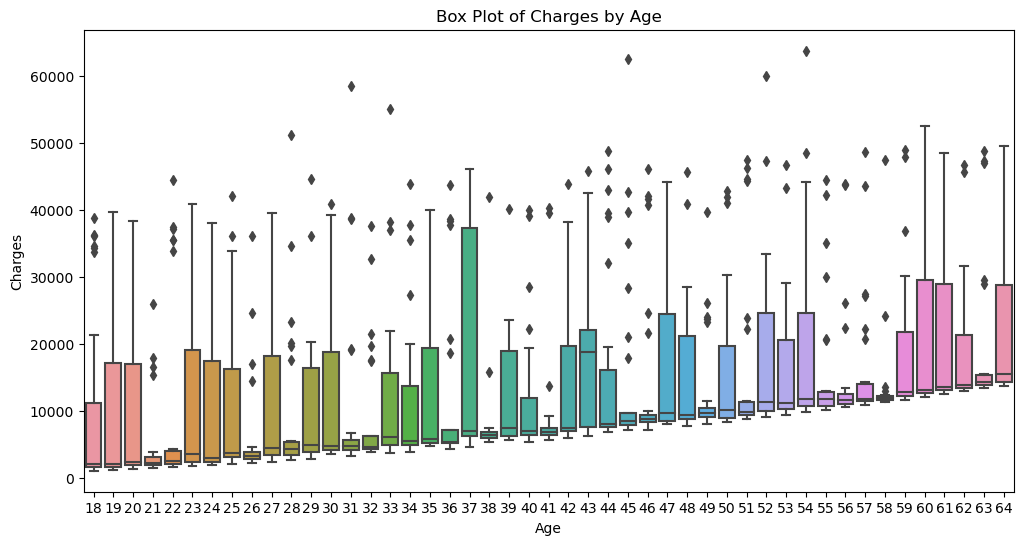

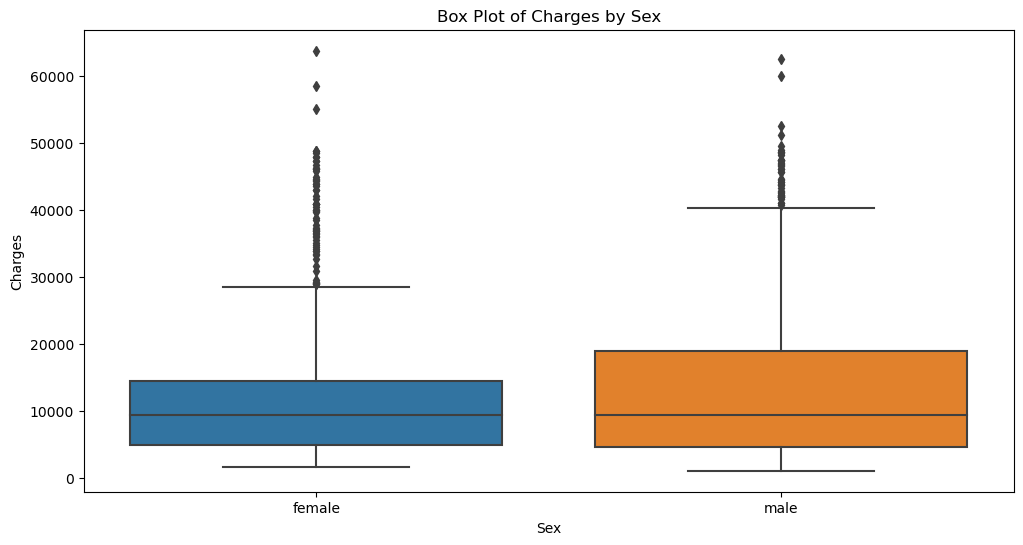

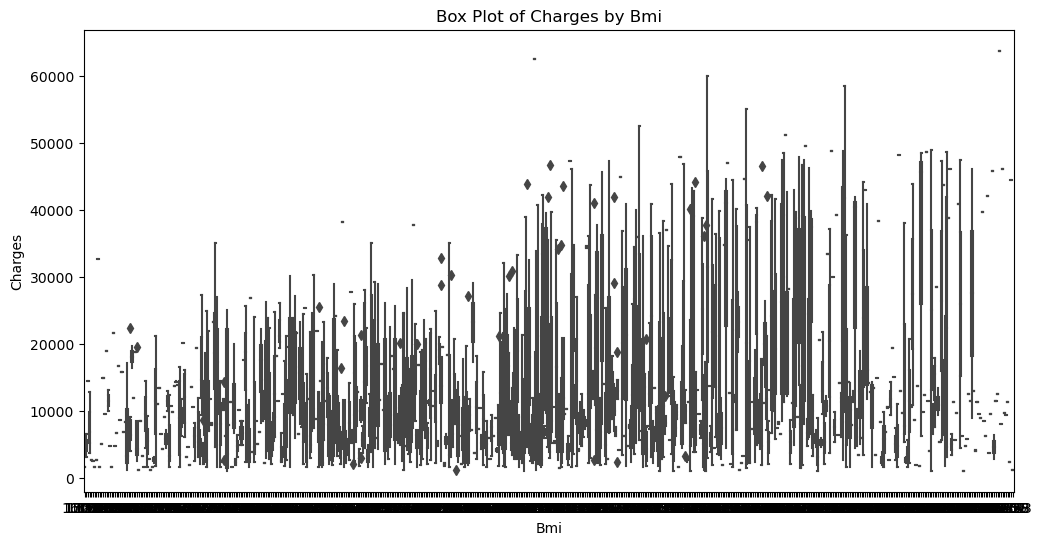

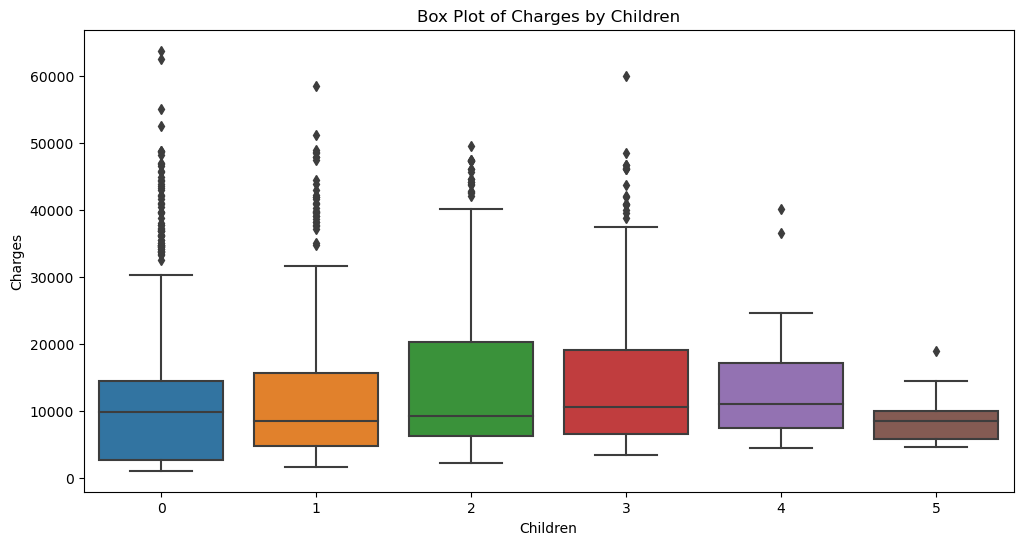

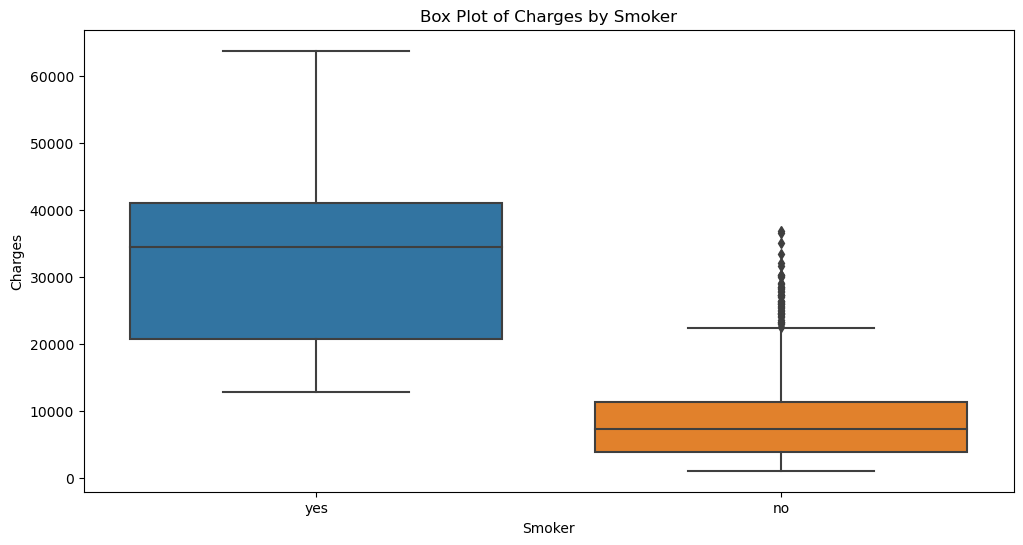

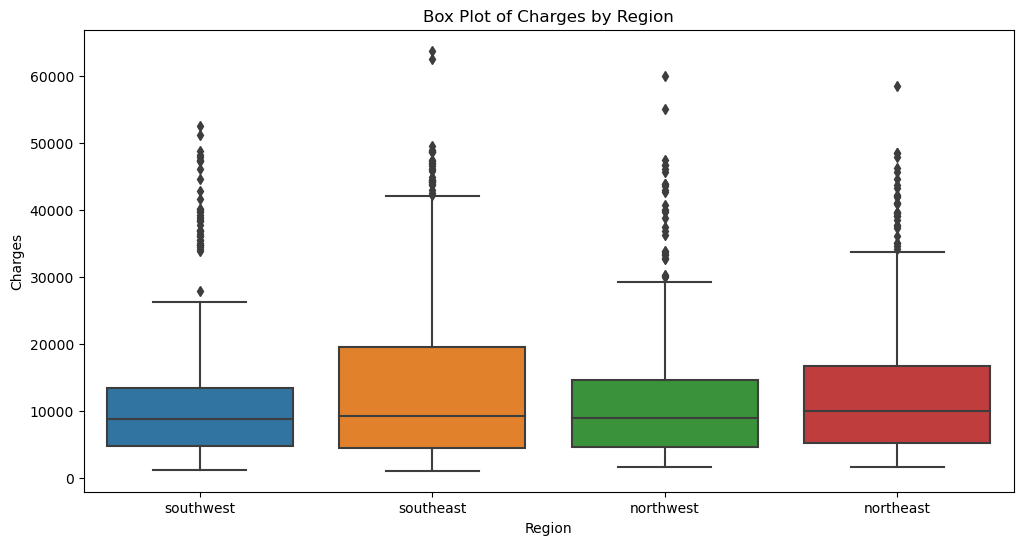

In [77]:
# Histograms for each feature
for feature in insurance_df.columns[:-1]:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=feature, y='charges', data=insurance_df)
    plt.title(f'Box Plot of Charges by {feature.capitalize()}')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Charges')
    plt.show()

In [87]:
smokers_charges = insurance_df[insurance_df['smoker'] == 'yes']['charges']
non_smokers_charges = insurance_df[insurance_df['smoker'] == 'no']['charges']

t_stat, p_value = stats.ttest_ind(smokers_charges, non_smokers_charges, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

T-statistic: 32.7519
P-value: 0.0000


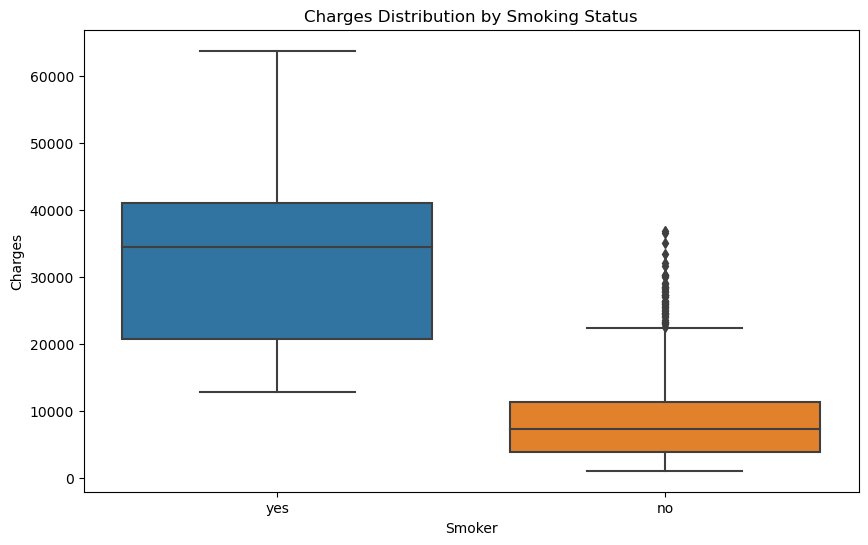

In [89]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoker', y='charges', data=insurance_df)
plt.title('Charges Distribution by Smoking Status')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()

In [96]:
# Frequency check
insurance_df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64